Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8010 - loss: 0.5698 - val_accuracy: 0.8840 - val_loss: 0.3259
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8952 - loss: 0.2915 - val_accuracy: 0.8997 - val_loss: 0.2755
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9128 - loss: 0.2415 - val_accuracy: 0.9089 - val_loss: 0.2515
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9245 - loss: 0.2053 - val_accuracy: 0.9112 - val_loss: 0.2493
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9366 - loss: 0.1739 - val_accuracy: 0.9118 - val_loss: 0.2466

Evaluating the model...
Test loss: 0.2637
Test accuracy: 0.9090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Prediction for the first test image: Ankle boot
True label for the first test image: Ankle boot


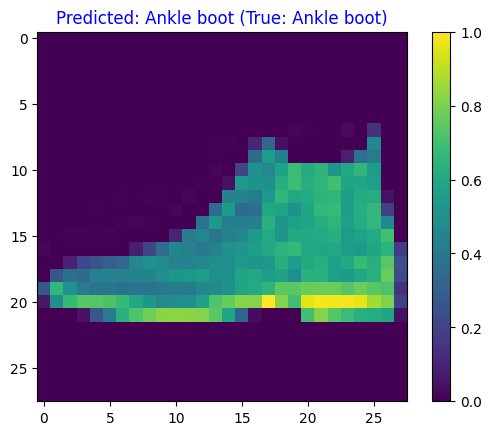

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

# Reshape data to add channel dimension
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

# Build a simpler CNN Model
model = Sequential()

# Single Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Single MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Single Dense Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Display Model Summary
model.summary()

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
print("\nTraining the model...")
model.fit(train_x, train_y, epochs=5, validation_split=0.2)

# Evaluate the Model
print("\nEvaluating the model...")
loss, acc = model.evaluate(test_x, test_y, verbose=0)

print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {acc:.4f}')

# Make a Prediction and Display
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make a prediction on the first test image
predictions = model.predict(test_x[:1])

# Get the index of the class with the highest probability
predicted_label_index = np.argmax(predictions)

# Get the corresponding label name
predicted_label = labels[predicted_label_index]

# Get the true label for the first test image
true_label_index = test_y[0]
true_label = labels[true_label_index]

# Print the predicted label
print(f"\nPrediction for the first test image: {predicted_label}")
print(f"True label for the first test image: {true_label}")

# Determine title color based on prediction correctness
color = 'blue' if predicted_label_index == true_label_index else 'red'

# Display the first test image with colored title
# Use a colormap for the grayscale image (e.g., 'viridis')
plt.imshow(test_x[:1][0].reshape(28, 28), cmap='viridis')
plt.title(f"Predicted: {predicted_label} (True: {true_label})", color=color)
plt.colorbar() # Add a colorbar to show the mapping of values to colors
plt.show()
